In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
columns = ["Sepal Length","Sepal width","Petal Length","Petal Width","Names"]
df = pd.read_csv("iris.data", names= columns)
df.head()


,Sepal Length,Sepal width,Petal Length,Petal Width,Names
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# to display stats about data
df.describe()

,Sepal Length,Sepal width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# to basic info about datatype
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Names         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# to display no. of samples on each class
df['Names'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Names, dtype: int64

## Preprocessing the dataset

In [9]:
# check for null values
df.isnull().sum()

Sepal Length    0
Sepal width     0
Petal Length    0
Petal Width     0
Names           0
dtype: int64

## Exploratory data analysis

<Axes: >

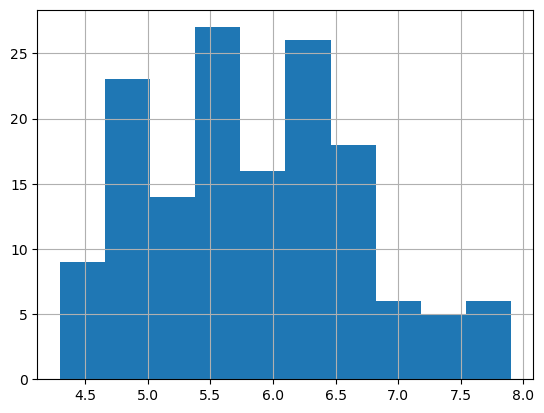

In [10]:
# histograms
df['Sepal Length'].hist()

<Axes: >

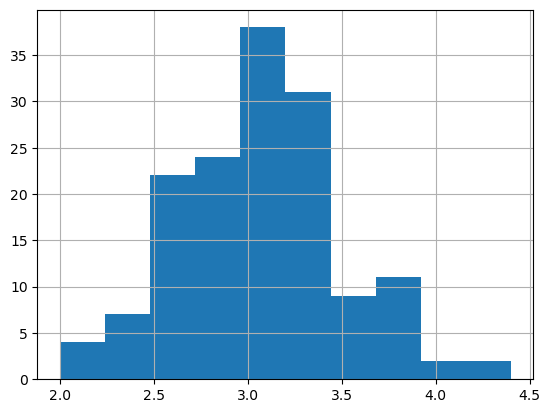

In [12]:
# histograms
df['Sepal width'].hist()

<Axes: >

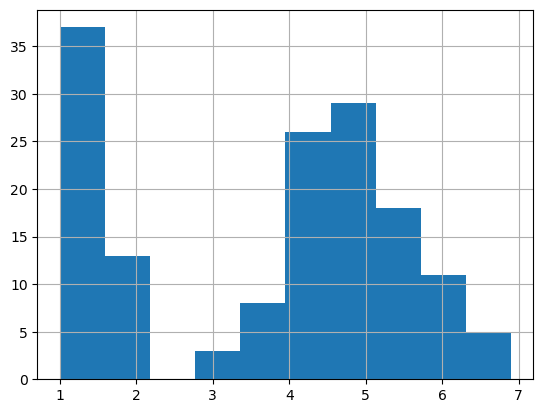

In [13]:
# histograms
df['Petal Length'].hist()

<Axes: >

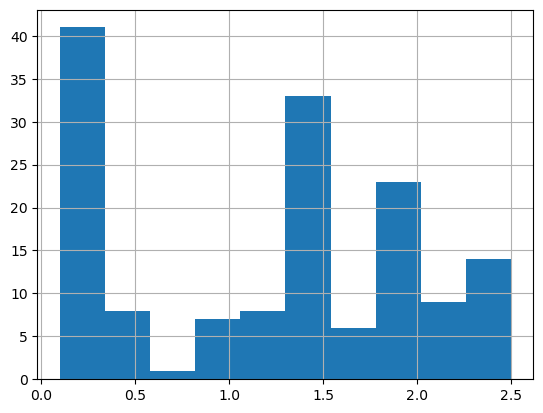

In [15]:
# histograms
df['Petal Width'].hist()

In [16]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

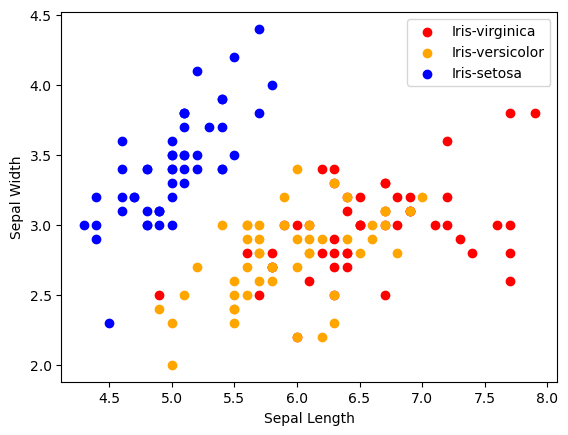

In [17]:
for i in range(3):
    x = df[df['Names'] == species[i]]
    plt.scatter(x['Sepal Length'], x['Sepal width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

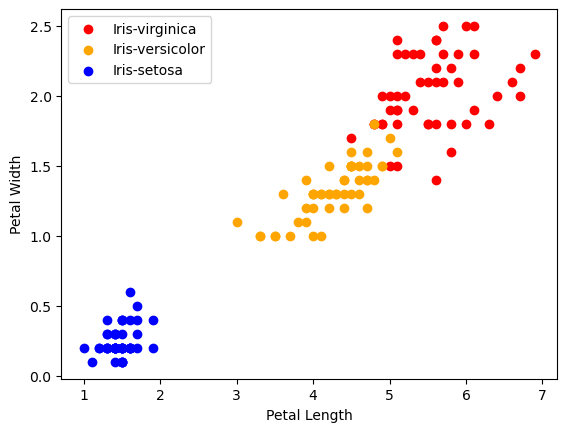

In [18]:
for i in range(3):
    x = df[df['Names'] == species[i]]
    plt.scatter(x['Petal Length'], x['Petal Width'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()


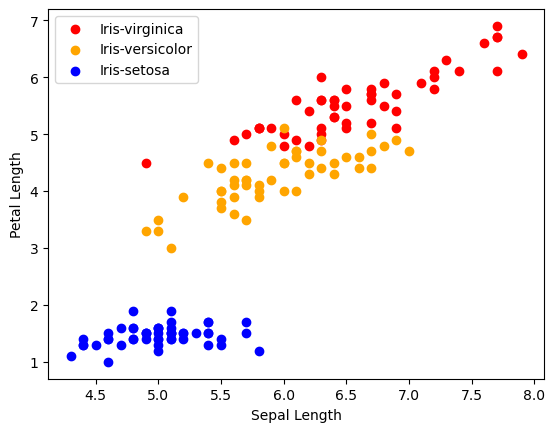

In [19]:
for i in range(3):
    x = df[df['Names'] == species[i]]
    plt.scatter(x['Sepal Length'], x['Petal Length'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

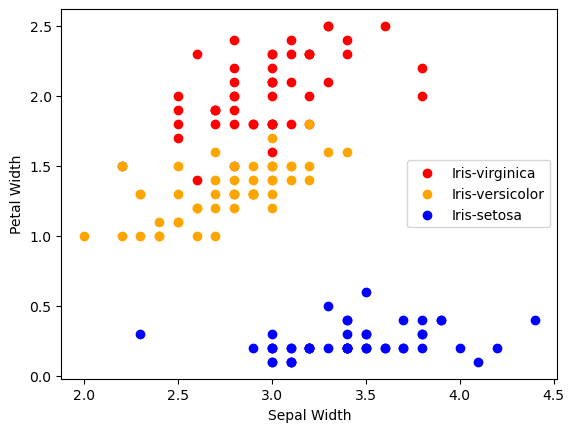

In [20]:
for i in range(3):
    x = df[df['Names'] == species[i]]
    plt.scatter(x['Sepal width'], x['Petal Width'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

## Correlation matrix

In [21]:
df.corr()

C:\Users\sheraz\AppData\Local\Temp\ipykernel_5752\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sepal Length,Sepal width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


C:\Users\sheraz\AppData\Local\Temp\ipykernel_5752\4174570067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

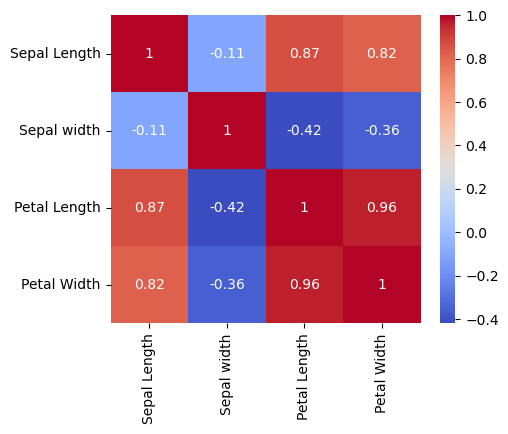

In [22]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')


## Label Encoder

in machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [24]:
df['Names'] = le.fit_transform(df['Names'])
df.head()

,Sepal Length,Sepal width,Petal Length,Petal Width,Names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training

In [25]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Names'])
Y = df['Names']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [26]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [27]:
# model training
model.fit(x_train, y_train)

D:\Anaconda3\envs\work\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [29]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [30]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [31]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


In [32]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [33]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556
